<a href="https://colab.research.google.com/github/Srayoshi-Mirza/Stress_Detection_Analysis/blob/main/Stress_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stress Level Prediction in Sleep Patterns**
**About the Dataset**
SaYoPillow (Smart-Yoga Pillow), a company that proposed to help in understanding the relationship between stress and sleep and to fully materialize the idea of “Smart-Sleeping” by proposing an edge device. An edge processor with a model analyzing the physiological changes that occur during sleep along with the sleeping habits is proposed. Based on these changes during sleep, stress prediction for the following day is proposed.

In order to achive this they conducted a research and compiled the dataset tyhat shows the relationship between parameters - snoring range of the user, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, number of hours of sleep, heart rate and Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high) that has been generated from Literature Review.



**Import necessary libraries**

In [107]:

import pandas as pd                    # For data manipulation and analysis using DataFrames
import numpy as np                     # For numerical operations
import matplotlib.pyplot as plt        # For creating visualizations
from matplotlib import colormaps
import seaborn as sns # For advanced visualizations and statistical graphics
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix            # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report       # Import the classification_report function for detailed classification metrics
from sklearn.linear_model import LogisticRegression    # For Logistic Regression model
from sklearn.ensemble import RandomForestClassifier

**Importing the Dataset**

In [108]:
# Reading the CSV file 'SaYoPillow.csv' and storing the data in a DataFrame called 'data'
data = pd.read_csv("https://raw.githubusercontent.com/Srayoshi-Mirza/Stress_Detection_Analysis/main/Dataset/SaYoPillow.csv")

# Displaying the first 5 rows of the dataset
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [109]:
# Displaying the last 5 rows of the dataset
data.tail()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


**Understanding our data**

In [110]:
# Shape of our data
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (630, 9)


In [111]:
# Identifying information about composition and potential data quality
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [112]:
# Displaying the columns in our dataset
data.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [113]:
# Renaming the columns of the DataFrame for better readability and understanding
data.columns=['Snoring Rate', 'Respiration Rate', 'Body Temperature', 'Limb Movement', 'Blood Oxygen',
             'Eye Movement', 'Sleeping Hours', 'Heart Rate', 'Stress Level']
data.head()

,Snoring Rate,Respiration Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleeping Hours,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


There are 630 records in this dataset and each record contains sleeping information such as snoring rate, number of hours of sleep, body temperature (Fahrenheit), etc. A common issue people have is reducing their snoring (rate). Using multi-linear regression modeling to predict snoring rate, it is possible to determine what features can be adjusted to reduce the snoring rate. Another issue is specifying stress levels. When asked by a medical professional on how stressed you are from a scale of 0 to 4 (0 being not stressed/low stress levels), there should be a more simplified version of that scale such as a categorical scale (not stressed, stressed, over stressed).

In [114]:
# To show statistical summary of the columns of our data
data.describe(include="all")

,Snoring Rate,Respiration Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleeping Hours,Heart Rate,Stress Level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


**Generating Pivot Table**

In [115]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [116]:
pivot_table = data.pivot_table(index='Stress Level',
                               values=['Snoring Rate', 'Respiration Rate', 'Body Temperature', 'Limb Movement', 'Blood Oxygen',
             'Eye Movement', 'Sleeping Hours', 'Heart Rate'],
                               aggfunc='mean')

print("Pivot Table:")
styled_pivot_table = pivot_table.style.background_gradient(cmap='Pastel2_r', axis=1)
styled_pivot_table

Pivot Table:


,Blood Oxygen,Body Temperature,Eye Movement,Heart Rate,Limb Movement,Respiration Rate,Sleeping Hours,Snoring Rate
Stress Level,,,,,,,,
0,96.000000,97.500000,70.000000,52.500000,6.000000,17.000000,8.000000,47.500000
1,93.500000,95.000000,82.500000,57.500000,9.000000,19.000000,6.000000,55.000000
2,91.000000,93.000000,90.000000,62.500000,11.000000,21.000000,3.500000,70.000000
3,89.000000,91.000000,97.500000,70.000000,14.500000,24.000000,1.000000,87.500000
4,85.000000,87.500000,102.500000,80.000000,18.000000,28.000000,0.000000,98.000000


# **Data Preprocessing**

In [117]:
#checking for null values in the dataframe
data.isnull().sum()

Snoring Rate        0
Respiration Rate    0
Body Temperature    0
Limb Movement       0
Blood Oxygen        0
Eye Movement        0
Sleeping Hours      0
Heart Rate          0
Stress Level        0
dtype: int64

The output of the line data.isnull().sum() indicates that there are no missing values in any of the columns of the dataset. Each column has a count of 0 for missing values.

**Checking distribution of Target Variable**

In [118]:
# To display number of samples on each class
data['Stress Level'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: Stress Level, dtype: int64

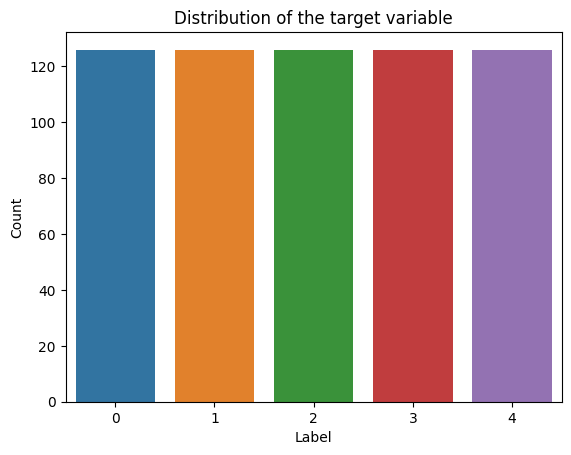

In [119]:
# Creating a count plot to visualize the distribution of the target variable 'stress_level'
# using the countplot() function from the seaborn library
# The 'stress_level' column from the DataFrame 'data' is specified as the x-axis variable
sns.countplot(x='Stress Level', data=data)

# Setting the label for the x-axis
plt.xlabel('Label')

# Setting the label for the y-axis
plt.ylabel('Count')

# Setting the title of the plot
plt.title('Distribution of the target variable')

# Displaying the plot
plt.show()

**Exploratory Data Analysis**

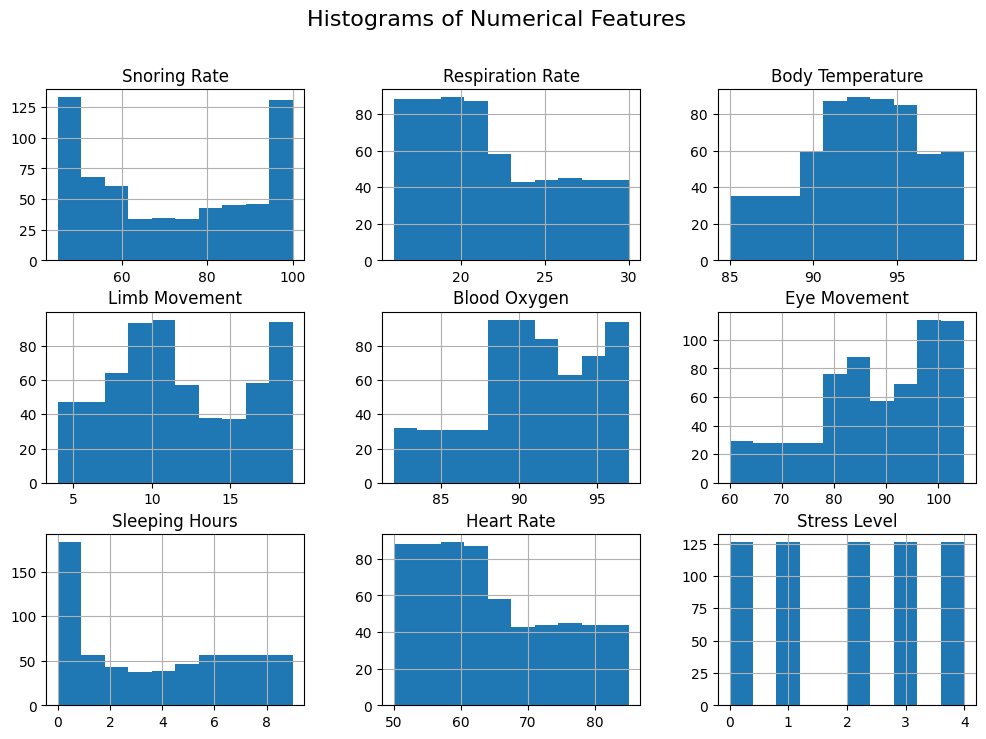

In [120]:
# Histograms for each numerical feature
data.hist(figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

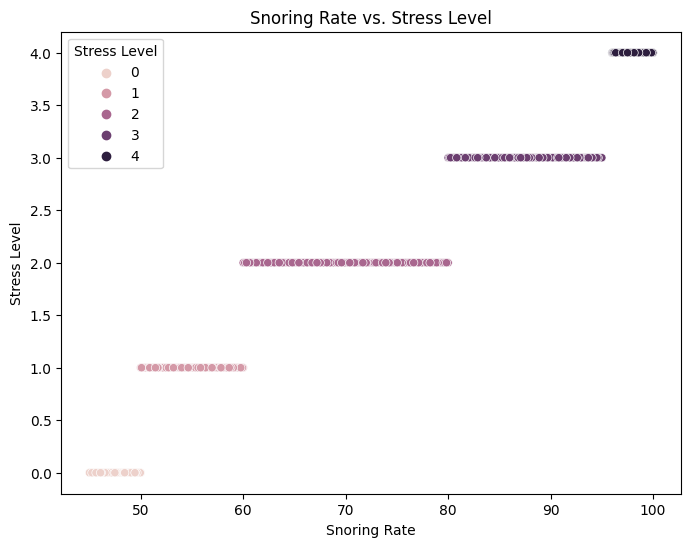

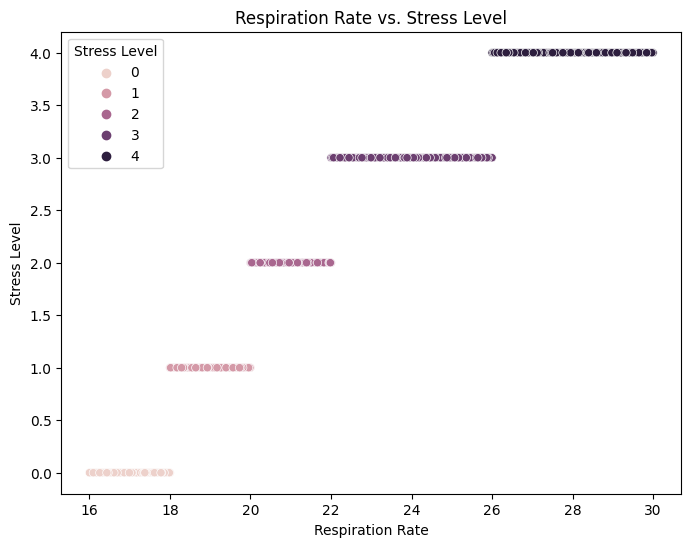

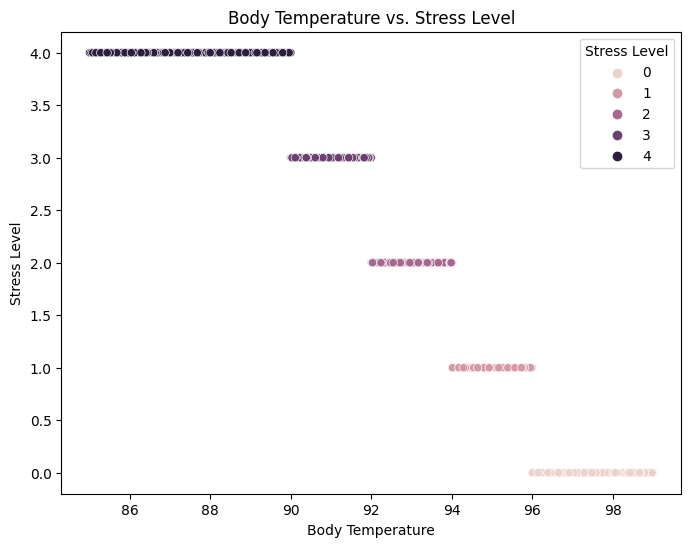

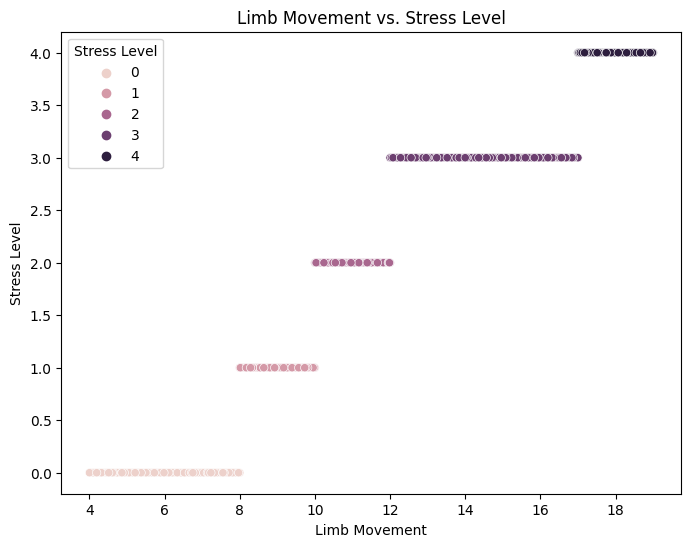

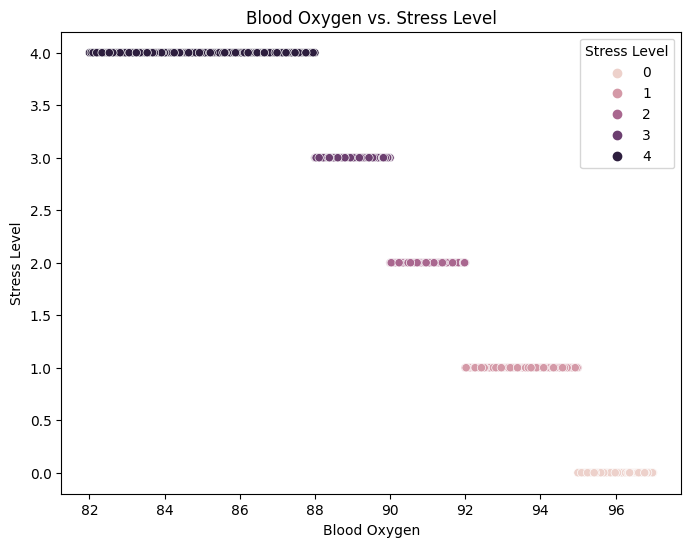

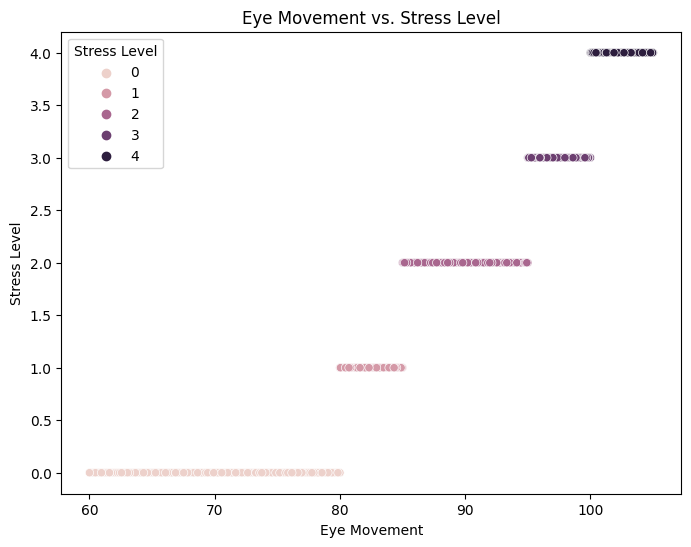

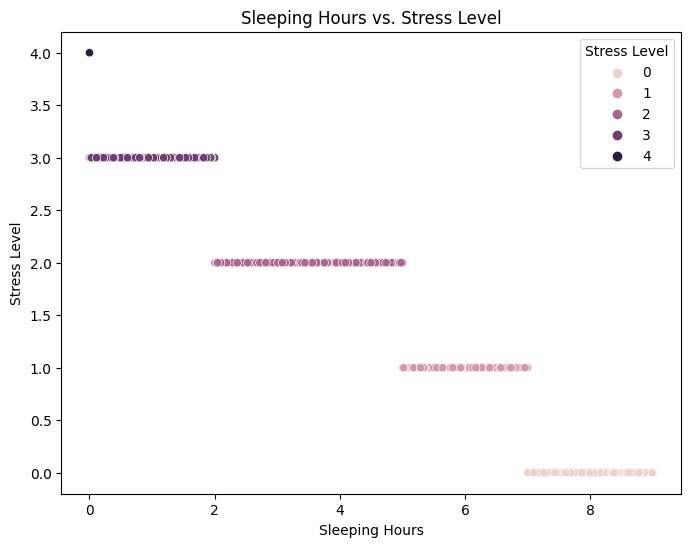

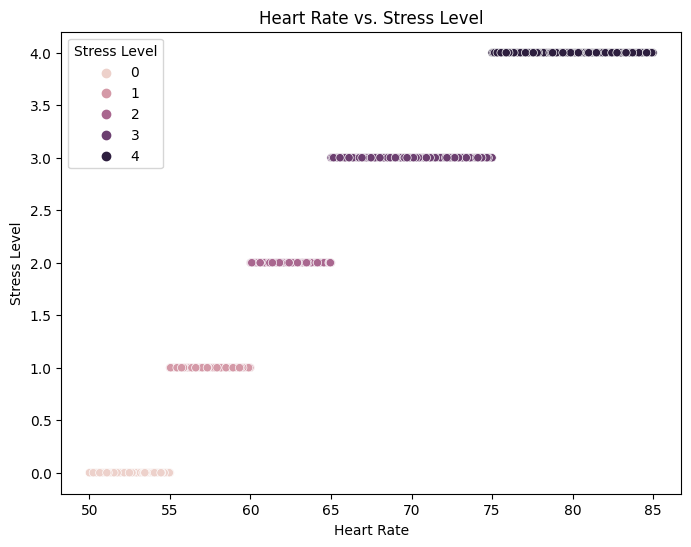

In [121]:
# Scatter plots for each numerical feature against 'stress_level'
for feature in data.columns[:-1]:  # Exclude the target variable 'stress_level'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=feature, y='Stress Level', hue='Stress Level')
    plt.title(f"{feature} vs. Stress Level")
    plt.xlabel(feature)
    plt.ylabel("Stress Level")
    plt.show()

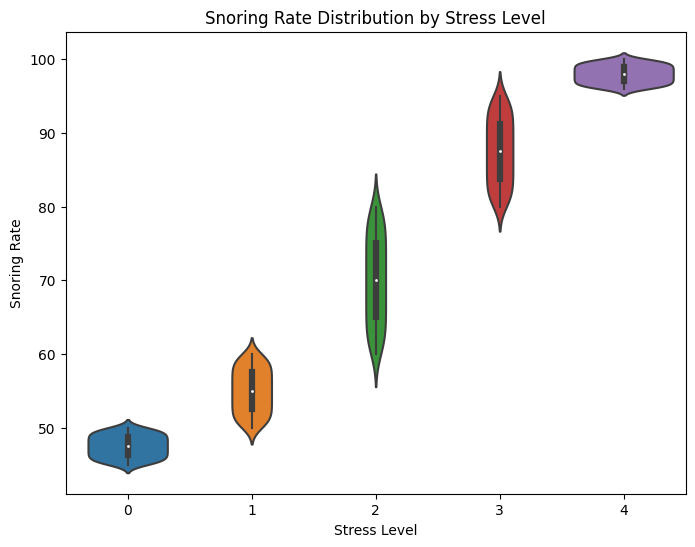

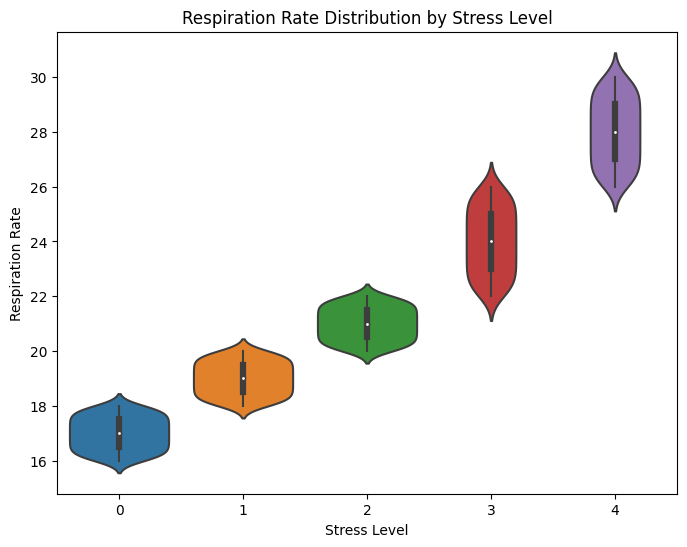

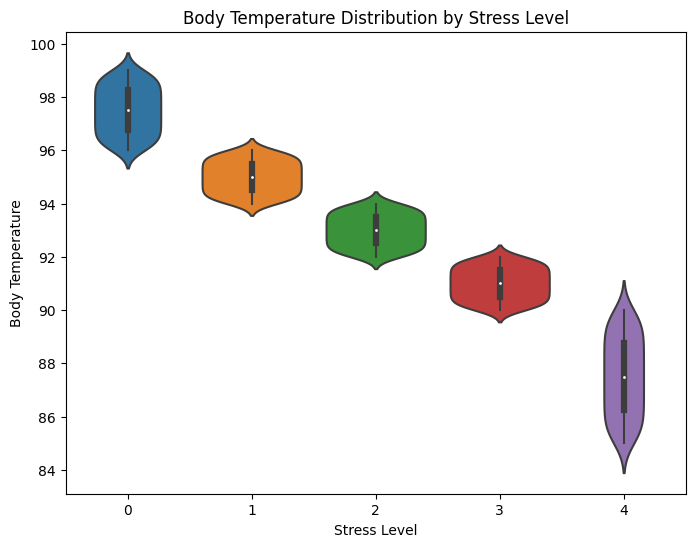

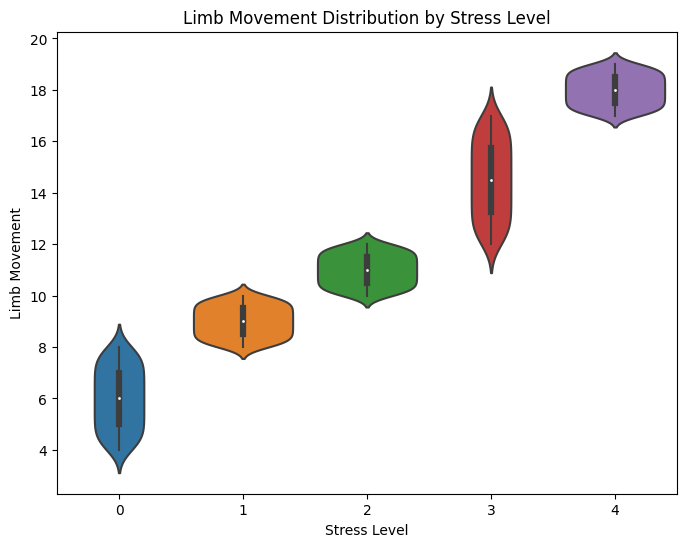

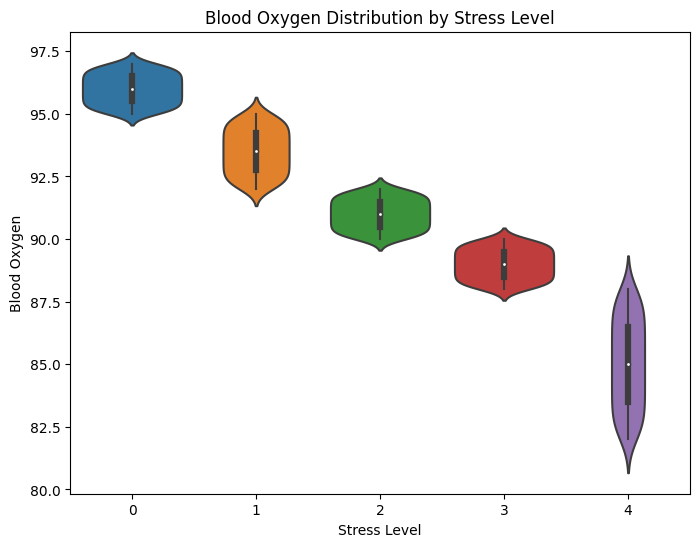

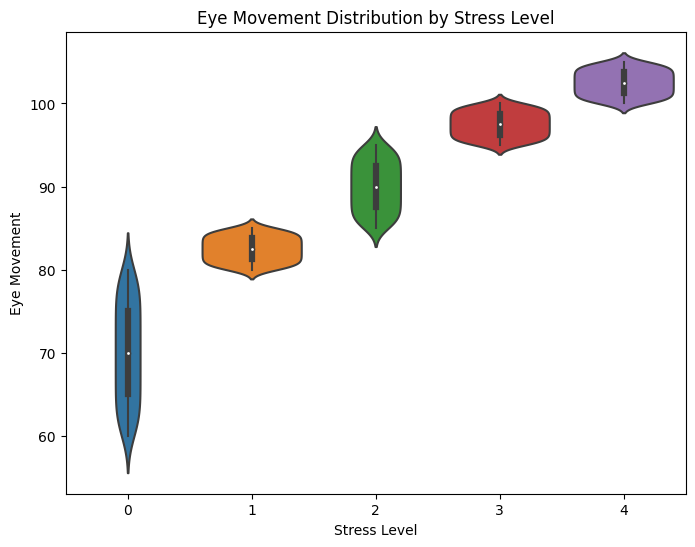

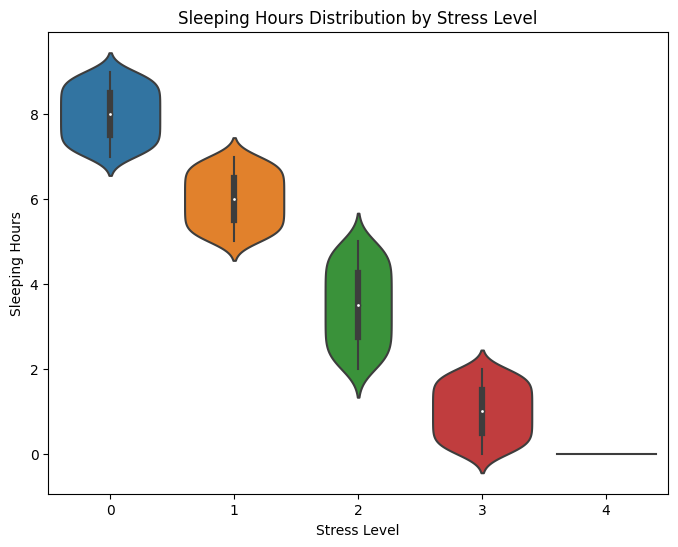

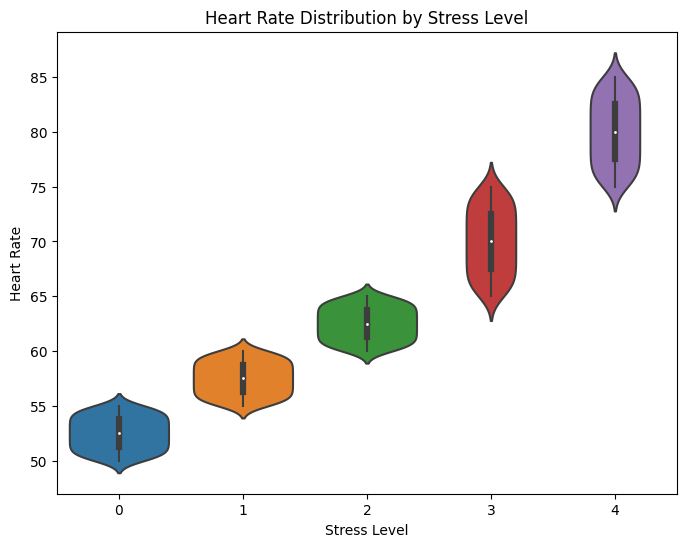

In [122]:
# Violin plots for numerical features based on 'stress_level'
for feature in data.columns[:-1]:  # Exclude the target variable 'stress_level'
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=data, x='Stress Level', y=feature)
    plt.title(f"{feature} Distribution by Stress Level")
    plt.xlabel("Stress Level")
    plt.ylabel(feature)
    plt.show()

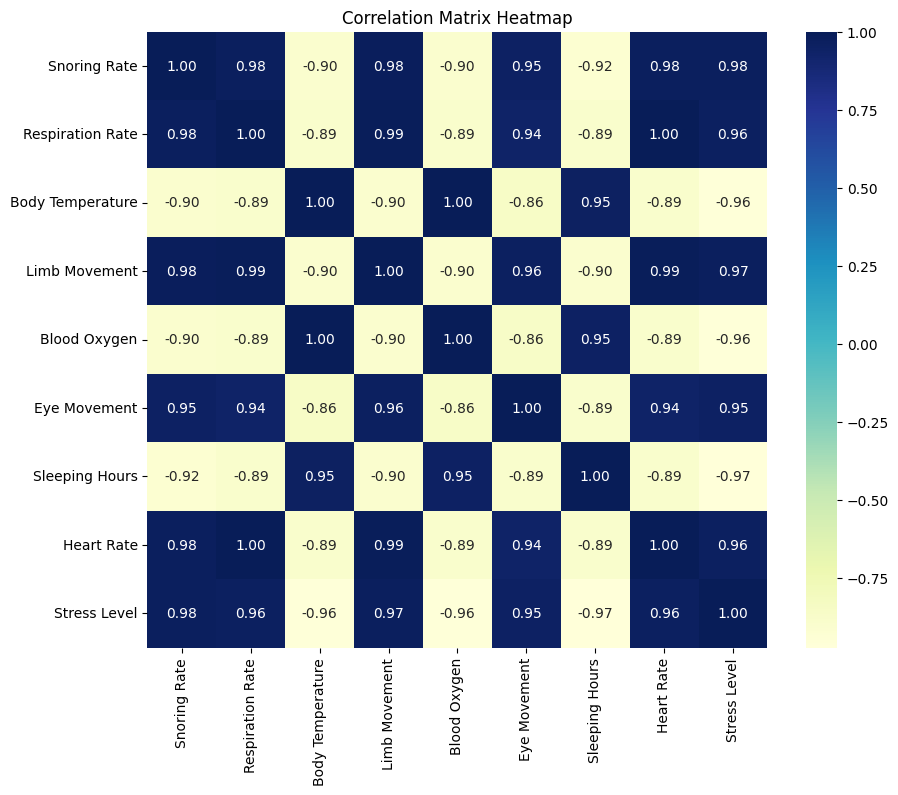

In [123]:
# Correlation Analysis: Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

**Outlier checking and Removal**

Text(0.5, 1.0, 'Box Plot of Features Before Outlier Removal')

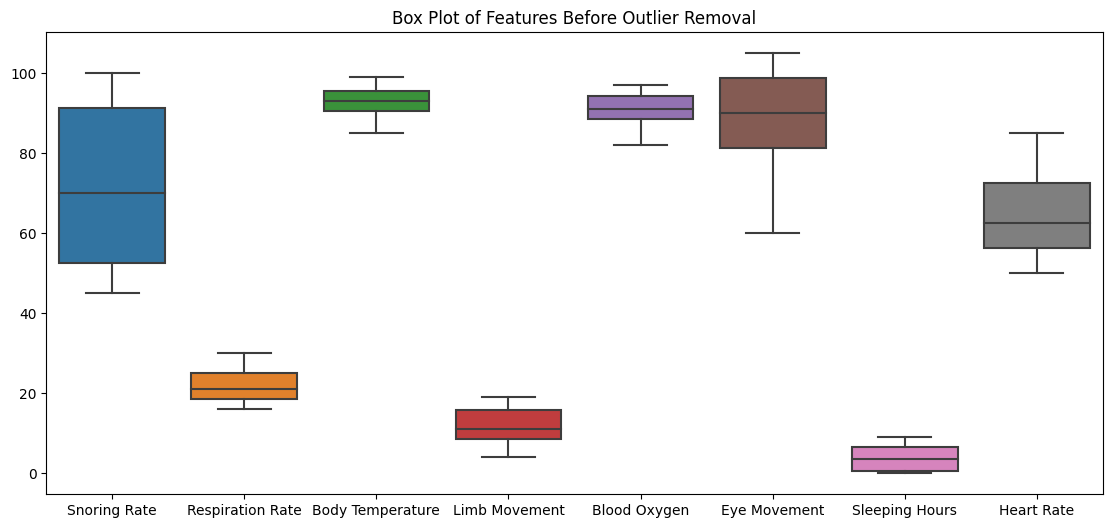

In [124]:
# Visualizing box plot before outlier removal
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data.drop('Stress Level', axis=1))
plt.title('Box Plot of Features Before Outlier Removal')

In [125]:
# Detect and remove outliers using Z-score
z_scores = np.abs(stats.zscore(data.drop('Stress Level', axis=1)))
filtered_entries = (z_scores < 3).all(axis=1)
data_no_outliers = data[filtered_entries]

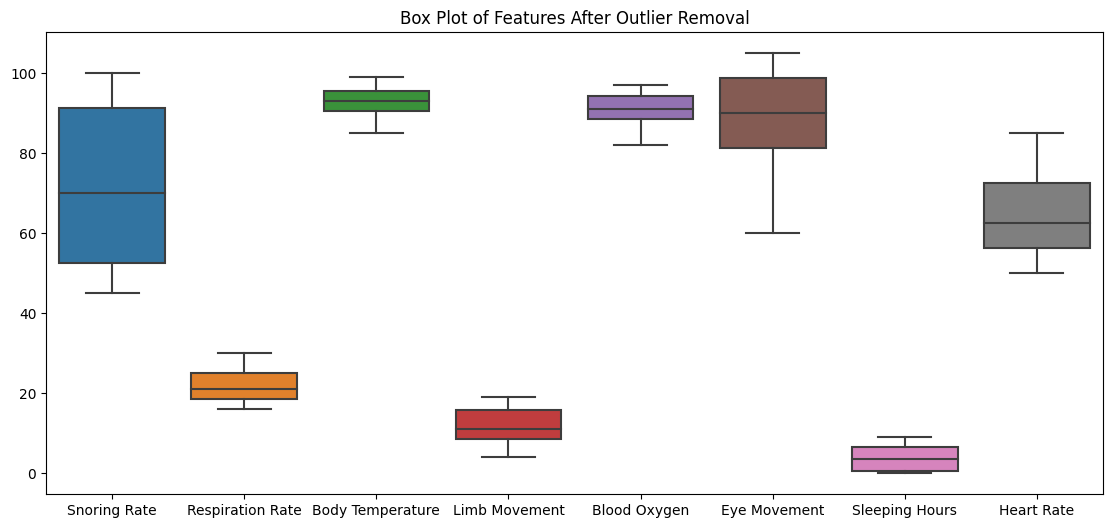

In [126]:
# Visualizing box plot after outlier removal
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_outliers.drop('Stress Level', axis=1))
plt.title('Box Plot of Features After Outlier Removal')
plt.show()

In [127]:
# Split the data into features (X) and the target variable (y)
X = data.drop(['Stress Level'], axis=1)
y = data['Stress Level']

In [128]:
# Scaling Transformation
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

**Splitting Dataset for Training**

In [130]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (504, 8)
y_train shape: (504,)
X_test shape: (126, 8)
y_test shape: (126,)


**Identifying Important features Using Random Forest Classifier**

Random Forest is a very powerful model both for regression and classification. It can give its own interpretation of feature importance as well, which can be plotted and used for selecting the most informative set of features according, for example, to a Recursive Feature Elimination procedure. Properly used, feature importance can give us very good and easy-to-understand deliverables (the bar plot which we did) and efficient optimization (feature selection).

In [131]:
# Create an instance of the RandomForestClassifier with hyperparameters
forest = RandomForestClassifier(n_estimators=500, random_state=1)

# Train the RandomForestClassifier on the training data
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [132]:
# Get the feature importances from the trained RandomForestClassifier
importances = forest.feature_importances_

# Loop over each feature and its importance
for i in range(X_train.shape[1]):
    # Print the feature number, name, and importance score
    print("%2d) %-*s %f" % (i + 1, 30, data.columns[i], importances[i]))

 1) Snoring Rate                   0.130143
 2) Respiration Rate               0.123295
 3) Body Temperature               0.122216
 4) Limb Movement                  0.123938
 5) Blood Oxygen                   0.136199
 6) Eye Movement                   0.137116
 7) Sleeping Hours                 0.104807
 8) Heart Rate                     0.122288


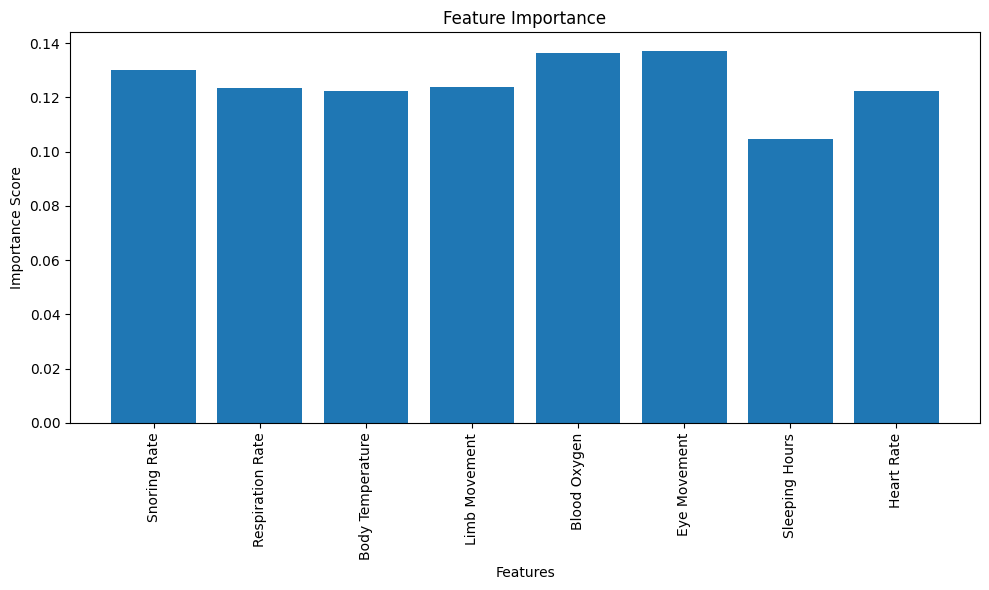

In [133]:
# Plotting the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.title('Feature Importance')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# **Model Training (Logistic Regression)**

A Logistic Regression model is trained on the cleaned and preprocessed data to predict stress levels based on sleep patterns. Logistic Regression is a commonly used algorithm for binary and multiclass classification tasks.

In [134]:
# Creating a logistic regression classifier object with specified parameters using the LogisticRegression class from scikit-learn
log_reg = LogisticRegression(max_iter=1000, C=0.1)#

# Training the logistic regression classifier using the training data
# The fit() method is called on the logistic regression object, specifying X_train and y_train as the training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

The max_iter parameter is set to 1000, which determines the maximum number of iterations for convergence. The C parameter is set to 0.1, which controls the regularization strength (inverse of the regularization parameter)

In [135]:
# Calculating the accuracy score of the logistic regression model on the test dataset using the score() method of the logistic regression object
# The X_test and y_test parameters are provided as the test data
log_reg.score(X_test, y_test)

1.0

An accuracy score of 1.0 (or 100%) indicates that every instance in the test dataset was predicted correctly by the model.

This is not always the case. This dataset was designed to make the prediction of a product. That's why this data is giving this much accurate results. This is not possible.

Using the trained logistic regression model to predict the labels for the test dataset using the predict() method of the logistic regression object.
The X_test parameter is provided as the test data. The predicted labels are assigned to the variable y_predict

In [136]:

y_predict = log_reg.predict(X_test)

# Calculate the confusion matrix to evaluate the performance of the model
# using the confusion_matrix() function from scikit-learn
# The true labels (y_test) and predicted labels (y_predict) are provided as the parameters
matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


In [137]:
# To Print the classification report to evaluate the performance of the model
# using the classification_report() function from scikit-learn
# The true labels (y_test) and predicted labels (y_predict) are provided as the parameters
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**Making a prediction**

In [138]:
# Predicting Stress Levels
# To predict stress levels for new data, you can use the 'predict' method of the trained model.
# For example, let's assume we have new data in a DataFrame called 'new_data':
new_data = pd.DataFrame([[100.0, 300.0, 80.0, 10.0, 60.0, 20.0, 6.0, 80.0]], columns=X.columns)

# Predict the stress level for the new data
predicted_stress_level = log_reg.predict(new_data)

# Dictionary to map integer stress levels to human-readable labels
stress_level_labels = {
    0: "Low/Normal",
    1: "Medium Low",
    2: "Medium",
    3: "Medium High",
    4: "High"
}

# Assuming you already have the 'predicted_stress_level' from the previous code snippet
predicted_stress_label = stress_level_labels[predicted_stress_level[0]]

# Display the human-readable label for the predicted stress level
print("Predicted Stress Label for New Data:",predicted_stress_level[0],"(",predicted_stress_label,")")

Predicted Stress Label for New Data: 4 ( High )
